In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\preshtha\Documents\dataset\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Check the Categorical and Numerical Columns.
cat_col=[col for col in df.columns if df[col].dtype=='object']
print('Categorial Columns :', cat_col)
num_col=[col for col in df.columns if df[col].dtype!='object']
print('Numerical Columns :', num_col)

Categorial Columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [6]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [7]:
df1=df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [8]:
#Handling missing Data
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [10]:
df2=df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'],axis=0,inplace=True)
df2.shape

(889, 9)

In [12]:
#Mean
df3=df2.fillna(df2.Age.mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

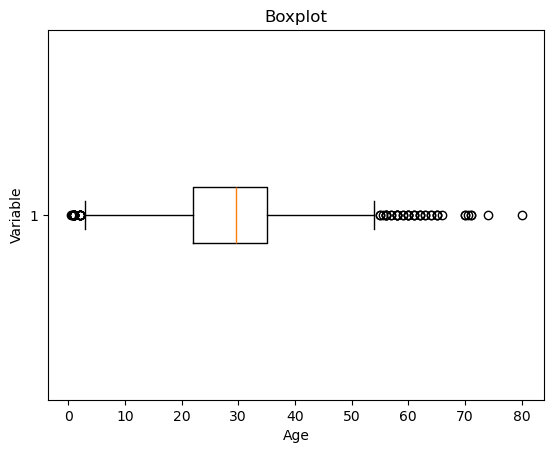

In [13]:
#Handling Outliers
import matplotlib.pyplot as plt
plt.boxplot(df3['Age'],vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Boxplot')
plt.show()

In [14]:
mean=df3['Age'].mean()
std=df3['Age'].std()
lower_bound=mean-std*2
upper_bound=mean+std*2
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)
df4=df3[(df3['Age']>=lower_bound)&(df3['Age']<=upper_bound)]

Lower Bound : 3.705400107925648
Upper Bound : 55.578785285332785


In [17]:
#Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
num_col_=[col for col in X.columns if X[col].dtype!='object']
x1=X
x1[num_col_]=scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\preshtha\AppData\Local\Temp\ipykernel_5792\3952461452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_]=scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S


In [18]:
#standardization z-score
import numpy as np
import pandas as pd
data = [10, 12, 13, 15, 18, 20, 21, 25]
mean = np.mean(data)
std_dev = np.std(data)
z_scores = [(x - mean) / std_dev for x in data]
print("Data:", data)
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Z-scores:", z_scores)
df = pd.DataFrame(data, columns=["Values"])
df["Z-score"] = (df["Values"] - df["Values"].mean()) / df["Values"].std()
print("\nUsing Pandas:")
print(df)


Data: [10, 12, 13, 15, 18, 20, 21, 25]
Mean: 16.75
Standard Deviation: 4.789311015167004
Z-scores: [-1.4093885276240774, -0.991791926846573, -0.7829936264578209, -0.3653970256803164, 0.2609978754859403, 0.6785944762634447, 0.887392776652197, 1.722585978207206]

Using Pandas:
   Values   Z-score
0      10 -1.318362
1      12 -0.927736
2      13 -0.732423
3      15 -0.341798
4      18  0.244141
5      20  0.634767
6      21  0.830080
7      25  1.611332
